In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

# Downloaded dataset from kaggle

In [ ]:
!kaggle datasets download -d salmansajid05/oral-diseases

 98% 230M/235M [00:01<00:00, 192MB/s]
100% 235M/235M [00:01<00:00, 160MB/s]


In [ ]:
!unzip /content/oral-diseases.zip

Streaming output truncated to the last 5000 lines.
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4772.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4773.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4776.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4782.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4803.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4807.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4808.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_481.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview/Mouth_Ulcer_0_4812.jpeg  
  inflating: Mouth Ulcer/Mouth Ulcer/Mout

# Created new file called "dataset" where i moved necessary files

In [ ]:
import os
import shutil

# Specify the paths of the folders to be moved
folder1_path = '/content/Calculus/Calculus'
folder2_path = '/content/Data caries/Data caries/caries augmented data set/preview'
folder3_path='/content/Gingivitis/Gingivitis'
folder4_path='/content/Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview'
folder5_path='/content/Tooth Discoloration/Tooth Discoloration /Tooth_discoloration_augmented_dataser/preview'
folder6_path='/content/hypodontia/hypodontia'


# Specify the destination directory (dataset) path
destination_path = '/content/dataset'



# Create the destination directory if it doesn't exist
if not os.path.exists(destination_path):
    os.makedirs(destination_path)
    print(f"Directory '{destination_path}' created successfully.")



# Moved folder1 to the dataset directory
shutil.move(folder1_path, destination_path)
print(f"Folder '{folder1_path}' moved to '{destination_path}'.")

# Moved folder2 to the dataset directory
shutil.move(folder2_path, destination_path)
print(f"Folder '{folder2_path}' moved to '{destination_path}'.")
new_folder_path = os.path.join(destination_path, 'preview')
os.rename(new_folder_path, os.path.join(destination_path, 'data_caries'))

# Moved folder3 to the dataset directory
shutil.move(folder3_path, destination_path)
print(f"Folder '{folder3_path}' moved to '{destination_path}'.")

# Moved folder4 to the dataset directory
shutil.move(folder4_path, destination_path)
print(f"Folder '{folder4_path}' moved to '{destination_path}'.")
new_folder_path = os.path.join(destination_path, 'preview')
os.rename(new_folder_path, os.path.join(destination_path, 'Mouth Ulcer'))


# Moved folder5 to the dataset directory
shutil.move(folder5_path, destination_path)
print(f"Folder '{folder5_path}' moved to '{destination_path}'.")
new_folder_path = os.path.join(destination_path, 'preview')
os.rename(new_folder_path, os.path.join(destination_path, 'Tooth Discoloration'))

# Moved folder6 to the dataset directory
shutil.move(folder6_path, destination_path)
print(f"Folder '{folder6_path}' moved to '{destination_path}'.")



Directory '/content/dataset' created successfully.
Folder '/content/Calculus/Calculus' moved to '/content/dataset'.
Folder '/content/Data caries/Data caries/caries augmented data set/preview' moved to '/content/dataset'.
Folder '/content/Gingivitis/Gingivitis' moved to '/content/dataset'.
Folder '/content/Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview' moved to '/content/dataset'.
Folder '/content/Tooth Discoloration/Tooth Discoloration /Tooth_discoloration_augmented_dataser/preview' moved to '/content/dataset'.
Folder '/content/hypodontia/hypodontia' moved to '/content/dataset'.


# We are creating two sub folders training(80%) and testing(20%) in dataset file

In [ ]:
#This code to create train and test folders which 80%=>training,20%=>testing

import os
import random
import shutil
# Set the path to your dataset
base_dir = '/content/dataset'

# Create training and testing directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Set the percentage of data for training (80%) and testing (20%)
train_percentage = 0.8

# Iterate through each class folder
classes = ['Calculus', 'Gingivitis', 'Mouth Ulcer', 'Tooth Discoloration','data_caries','hypodontia']
for class_name in classes:
    class_dir = os.path.join(base_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)

    # Calculate the split index
    split_index = int(train_percentage * len(images))

    # Split the images into training and testing sets
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Create class directories in the training and testing directories
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Move images to the respective directories
    for img in train_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(train_class_dir, img)
        shutil.copyfile(src, dst)

    for img in test_images:
        src = os.path.join(class_dir, img)
        dst = os.path.join(test_class_dir, img)
        shutil.copyfile(src, dst)


# Image preprocessing

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
training_set = train_datagen.flow_from_directory(
    "/content/dataset/train",
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    "/content/dataset/test",
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)


Found 9319 images belonging to 6 classes.
Found 2334 images belonging to 6 classes.


# Model Building



In [ ]:
VGG16 = VGG16(input_shape=(IMAGE_SIZE + [3]), weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
for layer in VGG16.layers:
    layer.trainable = False

# Add your custom dense layers on top
x = Flatten()(VGG16.output)
x = Dense(256, activation='relu')(x)  # Add a dense layer with ReLU activation
x = Dense(128, activation='relu')(x)  # Add another dense layer with ReLU activation
prediction = Dense(6, activation='softmax')(x)

In [ ]:
model = Model(inputs=VGG16.input, outputs=prediction)

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)



In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Fine-tune the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/50
146/146 [==============================] - 165s 1s/step - loss: 0.9940 - accuracy: 0.5975 - val_loss: 0.7504 - val_accuracy: 0.6889
Epoch 2/50
146/146 [==============================] - 136s 931ms/step - loss: 0.6589 - accuracy: 0.7387 - val_loss: 0.6028 - val_accuracy: 0.7588
Epoch 3/50
146/146 [==============================] - 139s 955ms/step - loss: 0.5606 - accuracy: 0.7851 - val_loss: 0.5687 - val_accuracy: 0.7712
Epoch 4/50
146/146 [==============================] - 136s 929ms/step - loss: 0.4798 - accuracy: 0.8168 - val_loss: 0.4984 - val_accuracy: 0.8063
Epoch 5/50
146/146 [==============================] - 134s 920ms/step - loss: 0.4256 - accuracy: 0.8378 - val_loss: 0.4810 - val_accuracy: 0.8059
Epoch 6/50
146/146 [==============================] - 140s 960ms/step - loss: 0.3864 - accuracy: 0.8489 - val_loss: 0.4855 - val_accuracy: 0.8021
Epoch 7/50
146/146 [==============================] - 140s 958ms/step - loss: 0.3695 - accuracy: 0.8575 - val_loss: 0.4423 - va

In [ ]:
model.save('dvggk16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/youddr_model.h5')

In [ ]:
model.save('my_model.keras')

# Model testing

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

model=load_model('/content/dvgg16.h5')


In [ ]:
img = image.load_img("/content/dataset/train/Tooth Discoloration/Tooth_Discoloration_0_1002.jpeg", target_size=(224, 224))
x = image.img_to_array(img)
x=x/255
x = np.expand_dims(x, axis=0)


# Make predictions
preds = model.predict(x)


# Get the index of the predicted class
pred = np.argmax(preds, axis=1)

# Define the class labels
class_labels = ['Calculus', 'Gingivitis', 'Mouth Ulcer', 'Tooth Discoloration','Caries','hypodontia']
# Get the predicted class label
result = class_labels[pred[0]]

# Print the result
print("The predicted disease is "+result)

1/1 [==============================] - 0s 21ms/step
The predicted disease is Tooth Discoloration


## By how much percentage each class

Calculus: 0.00%
Gingivitis: 0.00%
Mouth Ulcer: 0.04%
Tooth Discoloration: 99.86%
Caries: 0.06%
hypodontia: 0.04%


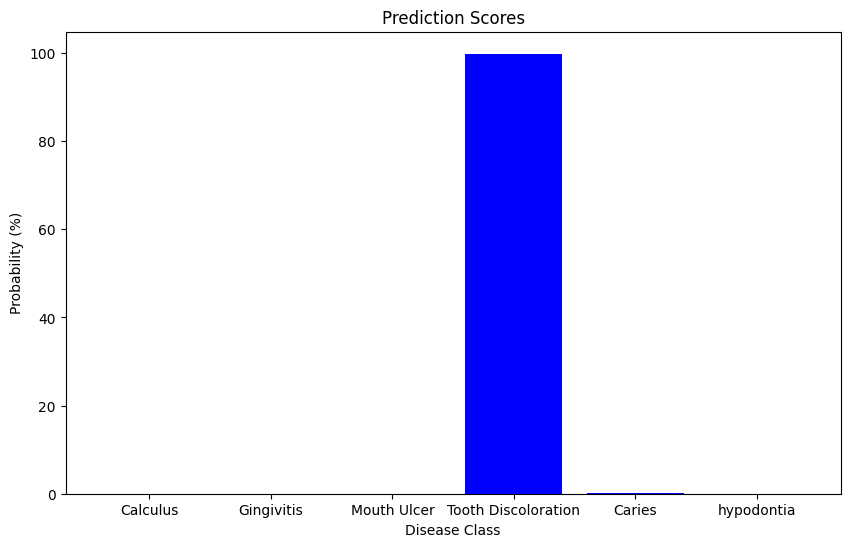

In [ ]:
for label, prob in zip(class_labels, preds[0]):
    print(f"{label}: {prob * 100:.2f}%")

# Plotting the prediction scores as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_labels, preds[0] * 100, color='blue')
plt.xlabel('Disease Class')
plt.ylabel('Probability (%)')
plt.title('Prediction Scores')
plt.show()